## Lab 2

In [ ]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Read the Bank.csv file

In [ ]:
df = pd.read_csv('bank.csv')

## Check the top 5 records frm the file

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


![image.png](attachment:ba33ad60-76f8-4374-aa20-9d0cde349c40.png)

## check the column name

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## Check the data type of each attribute

In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


## Modifying to relavant attribute types in the datafram

In [ ]:
for column in df.columns:
  if df[column].dtype == object:
    df[column] = df[column].astype('category')

# day
df['day'] = df['day'].astype('category')

# pdays
df.dtypes

,0
age,int64
job,category
marital,category
education,category
default,category
balance,int64
housing,category
loan,category
contact,category
day,category


## Provide a summary of statistics for numerical attributes

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


## Check the total number of Missing Value in the data frame

In [ ]:
df.isnull().sum().sum()

0

## If an attribute has more than 50% of its values missing, please remove that feature.

In [ ]:
# there is no missing values from this dataframe

## Replace the missing value in the balance attribute by average balance.

In [ ]:
mean = df.loc[df['balance'] != 0, 'balance'].mean()

df.loc[df['balance'] == 0, 'balance'] = mean
df['balance'].head()

<ipython-input-12-bce43f6ace9c>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1544.6292026897215' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['balance'] == 0, 'balance'] = mean


,balance
0,1787.000000
1,4789.000000
2,1350.000000
3,1476.000000
4,1544.629203


## If any other missing values are found, remove them using the "dropna" command.

In [ ]:
df.isnull().sum()
# there is no other missing values from this dataframe

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


## Analyze the distribution of the balance attribute and identify any outliers. If outliers are detected, replace them with the lower or upper quartile values accordingly.

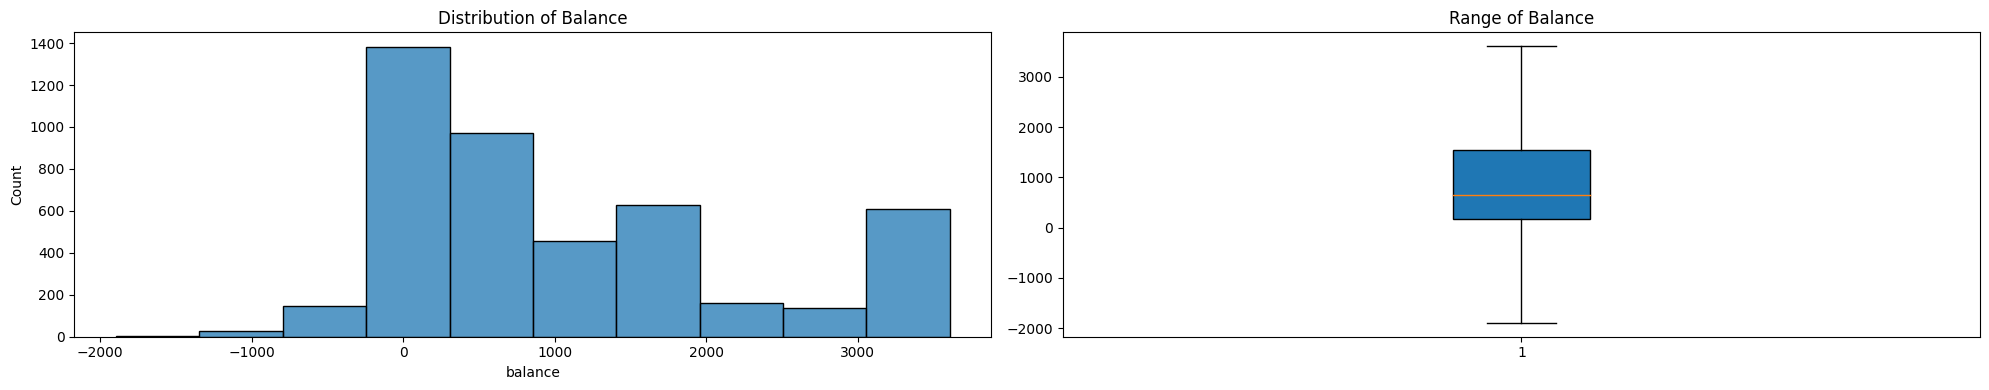

In [ ]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.loc[(df['balance'] < lower_bound), 'balance'] = lower_bound
df.loc[(df['balance'] > upper_bound), 'balance'] = upper_bound

fig, axes = plt.subplots(1,2, figsize=(20,4))

sb.histplot(df['balance'],bins=10,ax=axes[0])
plt.boxplot(df['balance'],patch_artist = True)

axes[0].set_title('Distribution of Balance')
axes[1].set_title('Range of Balance')
plt.tight_layout()

plt.show()

## variance

In [ ]:
df_int = df.select_dtypes(include=['int64'])
df_int.var()

,0
age,111.856238
duration,67525.469519
campaign,9.670897
pdays,10024.239560
previous,2.868153


## Check the target variable(y) is balaned or not using Pie chart.

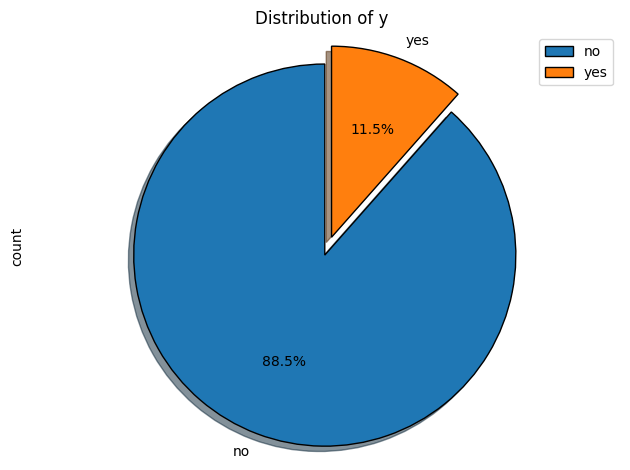

In [ ]:
ax = df['y'].value_counts().plot(kind ="pie",autopct='%1.1f%%', shadow=True,explode = [0, 0.1], startangle= 90,
        wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.title("Distribution of y ")
plt.legend()
plt.tight_layout()
plt.show()

## Corrrelation Plot

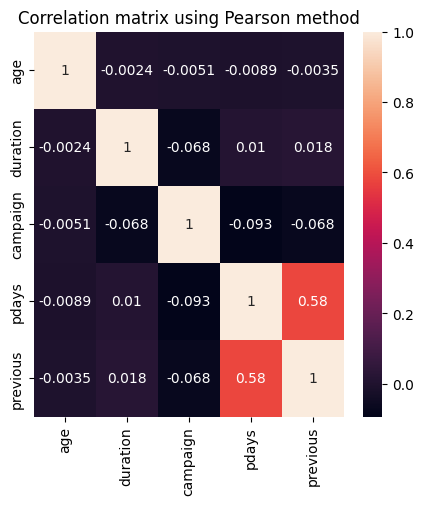

In [ ]:
plt.figure(figsize=(5,5))
df_int = df.select_dtypes(include=['int64'])
sb.heatmap(df_int.corr(), annot=True)
plt.title("Correlation matrix using Pearson method")

plt.show()

## Check the target variable(y) is balaned or not using Pie chart.

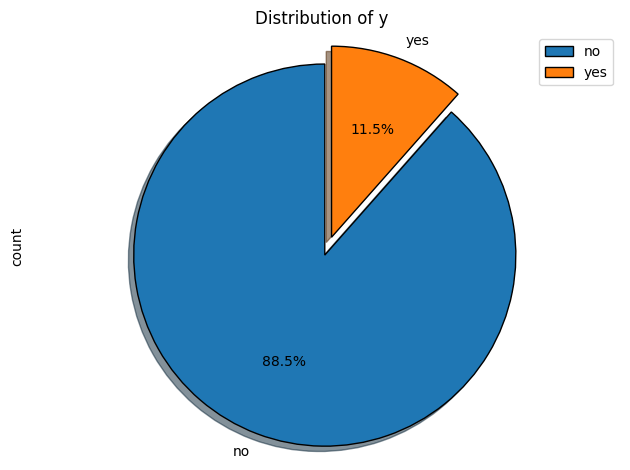

In [ ]:
ax = df['y'].value_counts().plot(kind ="pie",autopct='%1.1f%%', shadow=True,explode = [0, 0.1], startangle= 90,
        wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.title("Distribution of y ")
plt.legend()
plt.tight_layout()
plt.show()

## Best Regards
## Dr. Savita Seharawat